In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y115.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y192.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y162.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y9.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y108.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y155.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y106.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y258.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y103.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y185.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y180.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y120.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y54.jpg
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y165.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y112.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y99.JPG
/kaggle/input/brainm/yes-20240624T151115Z-001/yes/Y3.jpg
/ka

In [9]:
#importing the cv2 library for functions like reading an image , displaying an image , resizing an imageb ,etc 
import cv2

# I have defined a dictionary to map the class names to numerical labels as in ml we mostly work with numbers 
classes = {'no-20240624T151115Z-001/no': 0, 'yes-20240624T151115Z-001/yes': 1}

X = []  # Defining a empty list in which the image data will be stored later 
Y = []  # Defining an empty list here the 
#  Iterating through all the images under the folders of respective tumor types that were created before  
for cls in classes:
    pth = '/kaggle/input/brainm/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        if img is not None:
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)
# X = X.reshape(-1, 200, 200, 1)
X = X / 255.0
print(f'Unique labels in Y: {np.unique(Y)}')
print(f'Shape of X: {X.shape}')


Unique labels in Y: [0 1]
Shape of X: (253, 200, 200)


In [17]:
X=X.reshape(len(X),-1)
X.shape

(253, 40000)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [21]:
X_train=X_train.reshape(len(X_train),-1)
X_test=X_test.reshape(len(X_test),-1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.98)  # Retain 98% of the variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [27]:
import xgboost as xgb
# Initialize the model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=2)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict car prices on the test set
predictions = xg_reg.predict(X_test).flatten()


Accuracy: 0.803921568627451
Precision: 0.8529411764705882
Recall: 0.8529411764705882
F1 Score: 0.8529411764705882
ROC-AUC Score: 0.8546712802768166


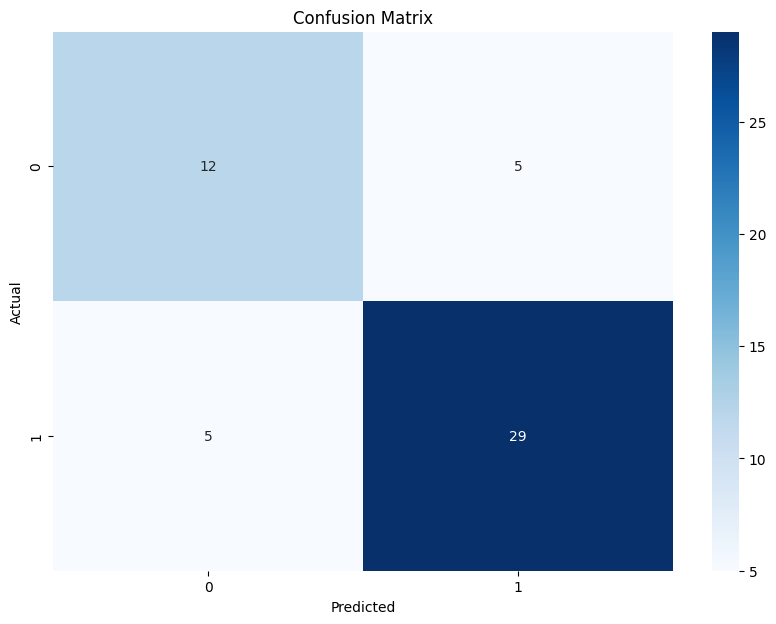

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Accuracy: 0.803921568627451
Precision: 0.8529411764705882
Recall: 0.8529411764705882
F1 Score: 0.8529411764705882
ROC-AUC Score: 0.8442906574394464


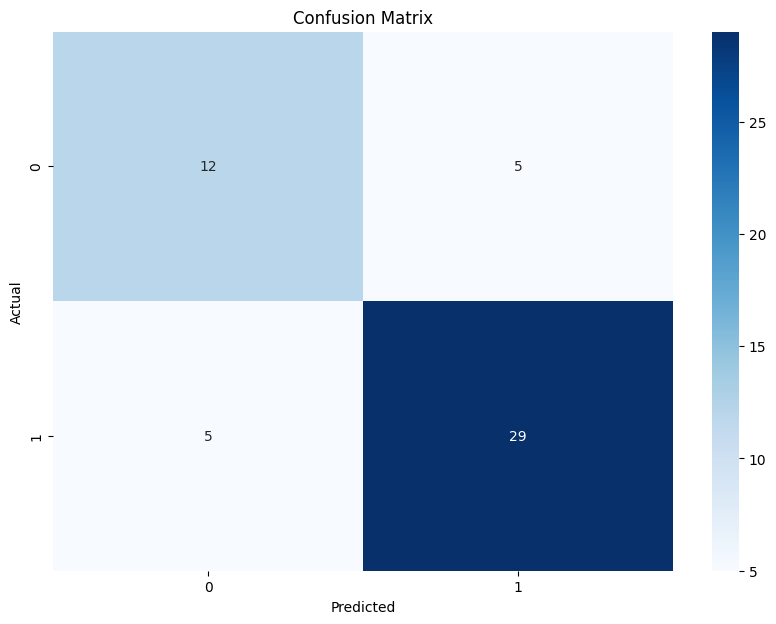

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
